# <a id="#">Task 4 – Edge detection: Derivative operators</a>

In [19]:
import numpy 
import matplotlib.pyplot as plt 
import skimage.io as skm 


---

## Prewitt filters

**<a id="#">Task 4.1.1.</a>** Load the image `data/astronaut.png` and show it:

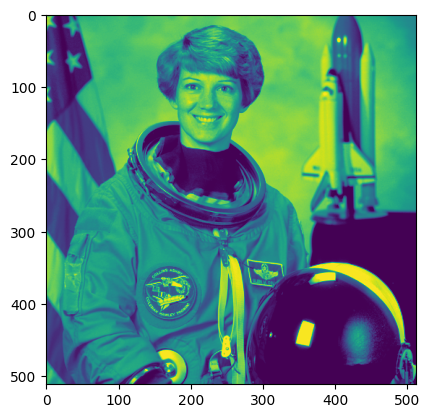

In [10]:
astro = plt.imread("data/astronaut.png")
plt.imshow(astro)

**<a id="#">Task 4.1.2.</a>** Implement horizontal and vertical 3&times;3 Prewitt filters:

In [14]:
def prewitt_h(img):
    result = numpy.zeros(img.shape)
    n = 1                                       # n immer 1 weil 3x3
    for p in numpy.ndindex(img.shape):
        neighborhood_sum = 0
        if n <= p[0] < img.shape[0]-n  and n <= p[1]<img.shape[1]-n: 
            for q in numpy.ndindex(3, 3):
                if q[1] == 0:
                  neighborhood_sum -= img[p[0] + q[0]-n, p[1] + q[1]- n]   # - wegen flipping 
                if q[1] == 2:
                  neighborhood_sum += img[p[0] + q[0]-n, p[1] + q[1]- n] 
            result[p] = (1/6) * neighborhood_sum  
    return result
    
    
def prewitt_v(img):
    result = numpy.zeros(img.shape)
    n = 1                                       # n immer 1 weil 3x3
    for p in numpy.ndindex(img.shape):
        neighborhood_sum = 0
        if n <= p[0] < img.shape[0]-n  and n <= p[1]<img.shape[1]-n: 
            for q in numpy.ndindex(3, 3):
                if q[0] == 0:
                  neighborhood_sum -= img[p[0] + q[0]-n, p[1] + q[1]- n]   # - wegen flipping 
                if q[0] == 2:
                  neighborhood_sum += img[p[0] + q[0]-n, p[1] + q[1]- n] 
            result[p] = (1/6) * neighborhood_sum  
    return result

**<a id="#">Task 4.1.3.</a>** Test your above solution using the functions `prewitt_h` and `prewitt_v` for the previously loaded image and show the result:

(512, 512)


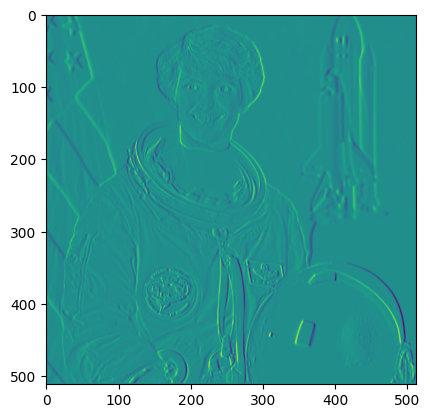

In [15]:
astro_y = prewitt_h(astro)
plt.imshow(astro_y)

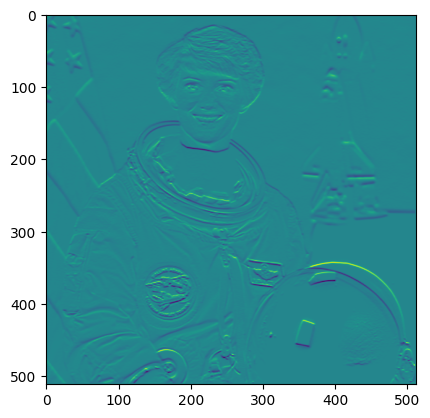

In [16]:
astro_x = prewitt_v(astro)
plt.imshow(astro_x)

**<a id="#">Task 4.1.4.</a>** Compare your results with the correct result image `data/astronaut_prewitt_h.tiff` and `data/astronaut_prewitt_v.tiff`:

In [21]:
solution_y  = skm.imread("data/astronaut_prewitt_h.tiff")


assert numpy.allclose(astro_y, solution_y, atol=1/255) 

In [22]:
solution_x  = skm.imread("data/astronaut_prewitt_v.tiff")

assert numpy.allclose(astro_x, solution_x, atol=1/255)

---

## Edge detection

**<a id="#">Task 4.2.1.</a>** Use your results from **Task 4.1.2 – 4.1.3** to compute the *gradient magnitude* of the image:

In [24]:
def magnitude_images(img):
    result = numpy.sqrt((prewitt_v(img)**2) + (prewitt_h(img)**2))
    return result 

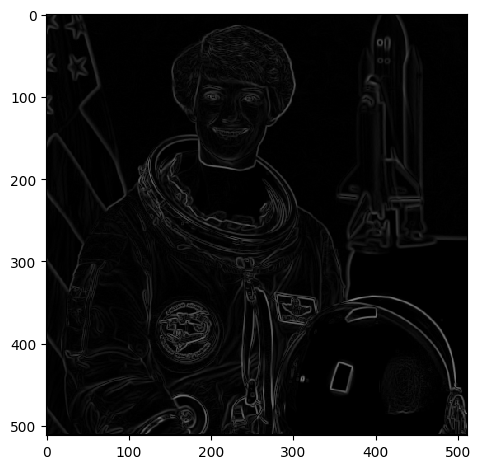

In [27]:
astro_mag = magnitude_images(astro) 
skm.imshow(astro_mag)

**<a id="#">Task 4.2.2.</a>** Compare your result with the correct result image `data/astronaut_prewitt_gradmag.tiff`:

In [29]:
solution_mag  = skm.imread("data/astronaut_prewitt_gradmag.tiff")


assert numpy.allclose(astro_mag, solution_mag, atol=1/255) 

---

## Sobel filters (bonus)

**<a id="#">Task 4.3.1.</a>** Implement the two functions `sobel_h` and `sobel_v` for horizontal and vertical 3&times;3 Sobel filtering, respectively:

**<a id="#">Task 4.3.2.</a>** Test your above solution using the functions `sobel_h` and `sobel_v` for the previously loaded image and show the result:

**<a id="#">Task 4.3.3.</a>** Compare your results with the correct result image `data/astronaut_sobel_h.tiff` and `data/astronaut_sobel_v.tiff`: